In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

%matplotlib inline

#### Power distribution example
$p(x) \propto x^n$

$$
p(x) = cx^n
$$

finding normalization constant c:
$$
\int_0^1 c x ^n dx = 1
$$
$$
c = n + 1
$$

Therefore, $p(x)=(n+1)x^n$. Integrate this PDF to get the CDF:
$$
P(x)=\int_0^x p(x')dx'=x^{n+1}
$$
Inversion:
$$
P^{-1}(x) = \sqrt[n+1]{x}
$$
Sample using uniform variable $\xi$ : $X = \sqrt[n+1]{\xi}$

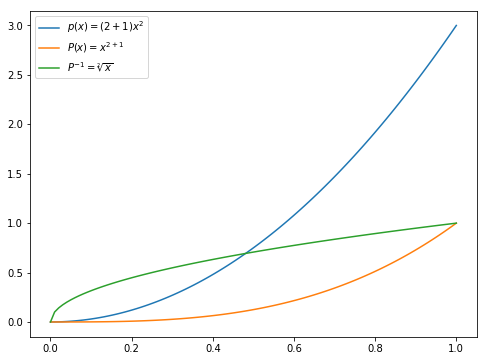

In [2]:
n = 2
dist = lambda x: (n + 1) * x ** n
cdf = lambda x: x ** (n + 1)
sample = lambda x: x**(1/float(n))

x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, dist(x), label='$p(x)=({0}+1)x^{0}$'.format(n))
ax.plot(x, cdf(x), label='$P(x)=x^{{{}+1}}$'.format(n))
ax.plot(x, sample(x), label='$P^{{-1}}=\sqrt[{}]{{x}}$'.format(n))
ax.legend(loc=0)

#### Piecewice-constant 1D function

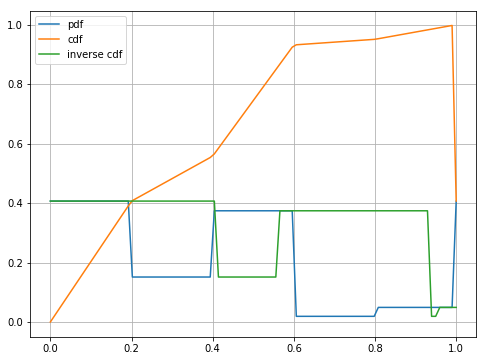

In [3]:
np.random.seed(6)

N = 5
pdf_pieces = np.random.rand(N)
pdf_pieces /= np.sum(pdf_pieces)
c = 1.0 / N

def pc_dist(x):
    return pdf_pieces[np.int16(x * N) % N]

def make_x_cdf():
    ret = np.zeros(N)
    for i in range(1, N):
        ret[i] = ret[i-1] + pdf_pieces[i-1]
    return ret

cdf_pieces = make_x_cdf()

def cdf(x):
    idx = np.int16(x * N) % N
    slope = (x % c) * (pdf_pieces[idx] / c)
    return cdf_pieces[idx] + slope

def inverse_cdf(x):
    # looking for index in cdf_pieces
    ret = np.zeros(x.shape)
    for idx, val in enumerate(x):
        ret[idx] = pdf_pieces[cdf_pieces <= val][-1]
    return ret
#     return np.apply_along_axis(lambda val: pdf_pieces[cdf_pieces <= val][-1], 0, x)

# print np.apply_along_axis(lambda val: val.shape, 0, x)
# inverse_cdf(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, pc_dist(x), label='pdf')
ax.plot(x, cdf(x), label='cdf')
ax.plot(x, inverse_cdf(x), label='inverse cdf')
ax.grid(True)
ax.legend(loc=0)